In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

df = pd.read_csv('~/mvpfile.csv')

In [36]:
features = df[['AssessTot','BldgArea', 'BoroCode', 'BsmtCode', 'ComArea',
       'FactryArea', 'GarageArea', 'LandUse', 'LotArea', 'LotType',
       'NumFloors', 'OfficeArea', 'OtherArea', 'ResArea', 'RetailArea',
       'StrgeArea', 'UnitsRes', 'UnitsTotal', 'YearAlter1', 'YearBuilt','311', 'hmc_v', 'hmc_c']]

In [37]:
target = df['has_lit']

In [60]:
target.value_counts()

0    743516
1     14654
Name: has_lit, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9785597386150948

In [40]:
f1_score(lr.predict(X_train),y_train)

0.0019149227191902613

In [58]:
lr.score(X_val,y_val)

0.9791686551493748

In [61]:
f1_score(lr.predict(X_val),y_val)

0.0

In [44]:
featureslist = list(features.columns)
featureslist

['AssessTot',
 'BldgArea',
 'BoroCode',
 'BsmtCode',
 'ComArea',
 'FactryArea',
 'GarageArea',
 'LandUse',
 'LotArea',
 'LotType',
 'NumFloors',
 'OfficeArea',
 'OtherArea',
 'ResArea',
 'RetailArea',
 'StrgeArea',
 'UnitsRes',
 'UnitsTotal',
 'YearAlter1',
 'YearBuilt',
 '311',
 'hmc_v',
 'hmc_c']

In [54]:
coefs = list()
for each in lr.coef_.tolist():
    for i in each:
        coefs.append(i)
list(zip(featureslist,coefs))

[('AssessTot', -1.1123797016661836e-07),
 ('BldgArea', 3.6369430157523e-05),
 ('BoroCode', -0.00016402578708219766),
 ('BsmtCode', -0.0001738311052684397),
 ('ComArea', -0.00012668683247542853),
 ('FactryArea', -6.257860412230014e-05),
 ('GarageArea', 8.045688379815782e-05),
 ('LandUse', -0.00037732417443734067),
 ('LotArea', -0.00030249231066196937),
 ('LotType', -0.0002032998130076594),
 ('NumFloors', 1.5111329637840165e-06),
 ('OfficeArea', 0.0001017911726935944),
 ('OtherArea', 7.0055288523888e-05),
 ('ResArea', -1.5909567247887724e-06),
 ('RetailArea', 5.262095021841774e-05),
 ('StrgeArea', 0.00011913819953435632),
 ('UnitsRes', 1.636625500775341e-05),
 ('UnitsTotal', 1.6923085522382965e-05),
 ('YearAlter1', 0.0003531274981659509),
 ('YearBuilt', -0.001622609287628588),
 ('311', 0.0008119550303034875),
 ('hmc_v', 0.0006757781977676991),
 ('hmc_c', 0.0)]

In this model, the number of 311 complaints, housing maintenance code violations, and year a building was renovated are the most important factors. This would make sense as if there are more complaints, the tenants are likely unhappy there. With regards to the renovation, it could be that this renovation caused problems for the tenants, leading to a lawsuit. The R2 score is very high, but because we are dealing with a fairly rare class (only about 14,000 buildings out of 750,000 have been involved in lawsuits), it isn't reliable. When testing with the F1 score, it is much more realistic and is extremely low.

In [55]:
lr_b = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_b.fit(X_train,y_train)
lr_b.score(X_train,y_train)

0.7381449781248807

In [56]:
f1_score(lr_b.predict(X_train),y_train)

0.08144544536290738

In [62]:
lr_b.score(X_val,y_val)

0.7390712990359836

In [64]:
f1_score(lr_b.predict(X_val),y_val)

0.07904156314481829

In [57]:
coefs2 = list()
for each in lr_b.coef_.tolist():
    for i in each:
        coefs2.append(i)
list(zip(featureslist,coefs))

[('AssessTot', -1.1123797016661836e-07),
 ('BldgArea', 3.6369430157523e-05),
 ('BoroCode', -0.00016402578708219766),
 ('BsmtCode', -0.0001738311052684397),
 ('ComArea', -0.00012668683247542853),
 ('FactryArea', -6.257860412230014e-05),
 ('GarageArea', 8.045688379815782e-05),
 ('LandUse', -0.00037732417443734067),
 ('LotArea', -0.00030249231066196937),
 ('LotType', -0.0002032998130076594),
 ('NumFloors', 1.5111329637840165e-06),
 ('OfficeArea', 0.0001017911726935944),
 ('OtherArea', 7.0055288523888e-05),
 ('ResArea', -1.5909567247887724e-06),
 ('RetailArea', 5.262095021841774e-05),
 ('StrgeArea', 0.00011913819953435632),
 ('UnitsRes', 1.636625500775341e-05),
 ('UnitsTotal', 1.6923085522382965e-05),
 ('YearAlter1', 0.0003531274981659509),
 ('YearBuilt', -0.001622609287628588),
 ('311', 0.0008119550303034875),
 ('hmc_v', 0.0006757781977676991),
 ('hmc_c', 0.0)]

With the model taking into account the class imbalance, the R2 is lower but the harmonic mean has risen significantly (0.08 from 0.0 on validation data). However, the same coefficients are important. 

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9965211361546213

In [66]:
f1_score(rf.predict(X_train),y_train)

0.9027595269382391

In [71]:
rf.score(X_val,y_val)

0.9812267347523146

In [72]:
f1_score(rf.predict(X_val),y_val)

0.16768050780216873

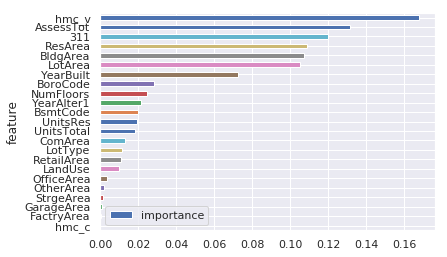

In [75]:
feat_imps = list(zip(features,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')


The random forest classifier performs twice as well as logistic regression, with the 3 most important features being housing maintenance code violations, assessed value of the lot, and 311 complaints. It's hard to figure out what the effect of assessed value of the lot is. It could be that lower-value lots have worse landlords, or it could be that higher-value lots have tenants who have more resources and access to legal aid and are more litigious.

In [69]:
rf_b = RandomForestClassifier(class_weight='balanced')
rf_b.fit(X_train,y_train)
rf_b.score(X_train,y_train)

0.9965064450066257

In [70]:
f1_score(rf_b.predict(X_train),y_train)

0.902787997710735

In [73]:
rf_b.score(X_val,y_val)

0.9811670802710699

In [74]:
f1_score(rf_b.predict(X_val),y_val)

0.14095238095238094

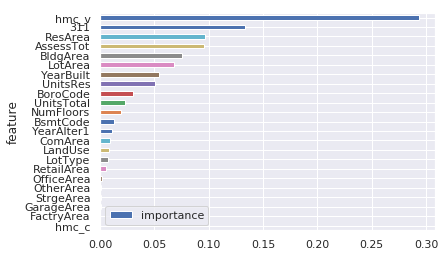

In [76]:
feat_imps = list(zip(features,rf_b.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

The balanced class random forest performs slightly worse, but it isn't a significant decrease in performance. With this classifier, the important features are housing maintenance code violations, 311 complaints, residential area and assessed value of the lot. 

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
gbm.score(X_train,y_train)

0.9816301885461933

In [78]:
f1_score(gbm.predict(X_train),y_train)

0.19805028219599793

In [79]:
gbm.score(X_val,y_val)

0.9818769685978811

In [80]:
f1_score(gbm.predict(X_val),y_val)

0.1924508240297714

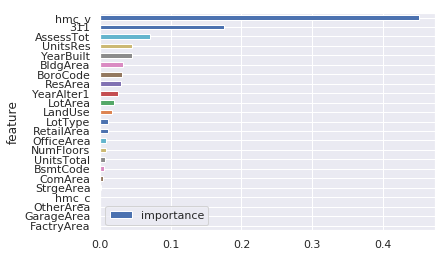

In [81]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

Gradient Boosting performs a bit better than the random forest, with the important features being housing maintenance code violations, 311 complaints, and assessed total value of the house.

The tree models aren't amazing at predicting, but handle the class imbalance better than logistic regression. More data cleaning is necessary to incorporate more features, like information from the Department of Buildings (which uses a different identification system for different buildings). Feature engineering and testing of different models will also be necessary once the data is wrangled.